In [86]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

prepared = pd.read_csv('../../datasets/wine_reviews/prepared/prepared_winemag-data-130k-v2.csv')

In [65]:
filtered = prepared.reindex(columns=['country', 'province', 'variety', 'winery', 'region_1', 'price', 'points'])
display(filtered)


,country,province,variety,winery,region_1,price,points
0,40,266,317,10688,1171,0.064935,3.5
1,40,216,346,11804,523,0.058442,3.5
2,40,266,321,11982,1171,0.396104,3.5
3,37,260,429,12051,719,0.071429,3.5
4,22,328,130,12313,1158,0.077922,3.5
...,...,...,...,...,...,...,...
100342,15,11,317,5156,21,0.155844,5.0
100343,40,266,321,4041,749,0.461039,5.0
100344,15,11,148,5009,21,0.168831,5.0
100345,15,11,317,5092,21,0.181818,5.0


# Considerando somente preço   

In [66]:
X = filtered['price'].values.reshape(-1, 1)
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model_considering_only_price = LinearRegression()
model_considering_only_price.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model_considering_only_price.predict(X_test)

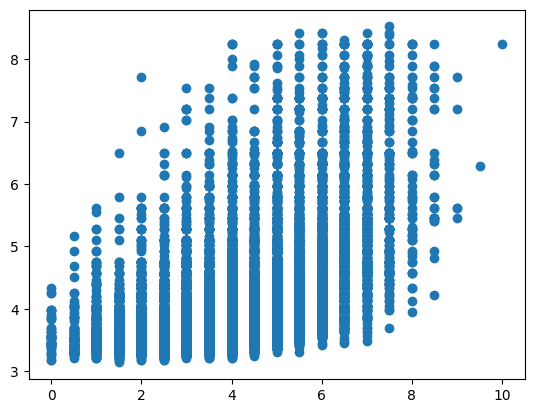

In [69]:
plt.scatter(y_test, y_pred)
plt.show()

In [70]:
print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {model_considering_only_price.score(X_test, y_test)}")

Erro Quadrado Médio: 1.6039311633173186
Erro Quadrado Absoluto: 1.0178177888746458
Score: 0.2967198072608732


# Considerando todas as variáveis numéricas

In [71]:
display(filtered)

,country,province,variety,winery,region_1,price,points
0,40,266,317,10688,1171,0.064935,3.5
1,40,216,346,11804,523,0.058442,3.5
2,40,266,321,11982,1171,0.396104,3.5
3,37,260,429,12051,719,0.071429,3.5
4,22,328,130,12313,1158,0.077922,3.5
...,...,...,...,...,...,...,...
100342,15,11,317,5156,21,0.155844,5.0
100343,40,266,321,4041,749,0.461039,5.0
100344,15,11,148,5009,21,0.168831,5.0
100345,15,11,317,5092,21,0.181818,5.0


In [72]:
X = filtered.iloc[:, :-1].values
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model_considering_all_numeric_variables = LinearRegression()
model_considering_all_numeric_variables.fit(X_train, y_train)

LinearRegression()

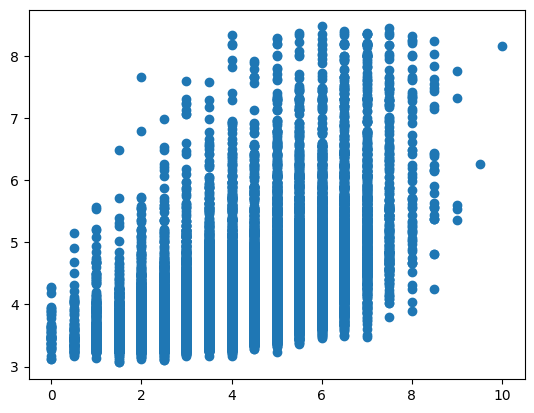

In [74]:
y_pred = model_considering_all_numeric_variables.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()

In [75]:
print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {model_considering_all_numeric_variables.score(X_test, y_test)}")

Erro Quadrado Médio: 1.5996475351434598
Erro Quadrado Absoluto: 1.0165202311600587
Score: 0.2985980617125814


# Regressão Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

X = filtered.iloc[:, :-1].values
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=100)
rf_regressor.fit(X_train, y_train)

rf_y_pred = rf_regressor.predict(X_test)

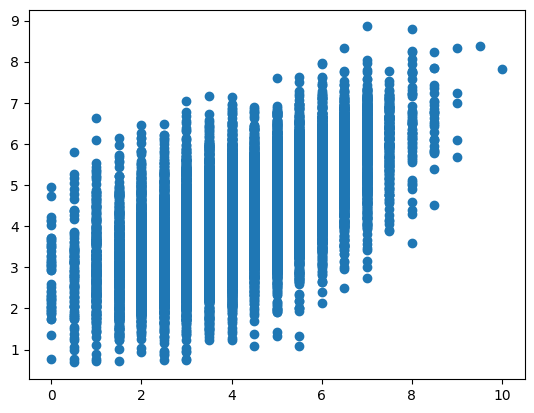

Erro Quadrado Médio: 1.2636465011489473
Erro Quadrado Absoluto: 0.8570725368483472
Score: 0.4459253768446566


In [77]:
plt.scatter(y_test, rf_y_pred)
plt.show()

print(f"Erro Quadrado Médio: {mean_squared_error(rf_y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(rf_y_pred, y_test)}")
print(f"Score: {rf_regressor.score(X_test, y_test)}")

# XGBRegressor

In [78]:
from xgboost import XGBRegressor
X = filtered.iloc[:, :-1].values
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
xgb_y_pred = xgb_regressor.predict(X_test)

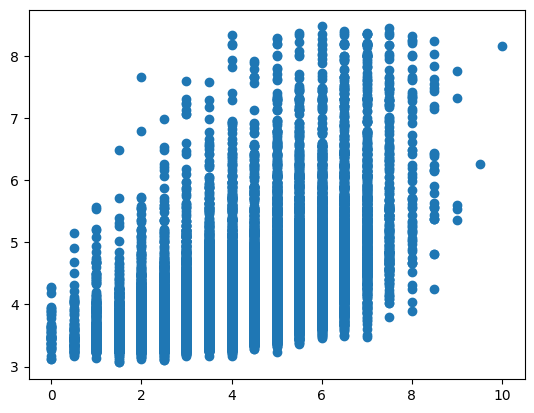

Erro Quadrado Médio: 1.2410443349467806
Erro Quadrado Absoluto: 0.8813140966254321
Score: 0.4558358120095334


In [79]:
plt.scatter(y_test, y_pred)
plt.show()

print(f"Erro Quadrado Médio: {mean_squared_error(xgb_y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(xgb_y_pred, y_test)}")
print(f"Score: {xgb_regressor.score(X_test, y_test)}")

# SVR

In [80]:
from sklearn.svm import SVR
X = filtered.iloc[:, :-1].values
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR()
svr_model.fit(X_train, y_train)

svr_y_pred = svr_model.predict(X_test)

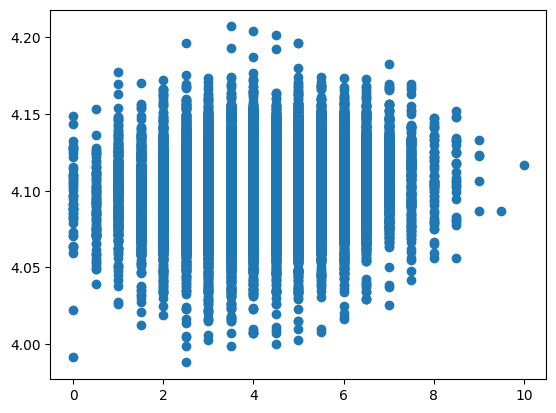

Erro Quadrado Médio: 2.2848273023331376
Erro Quadrado Absoluto: 1.2311957563801252
Score: -0.0018346312550368005


In [81]:
plt.scatter(y_test, svr_y_pred)
plt.show()

print(f"Erro Quadrado Médio: {mean_squared_error(svr_y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(svr_y_pred, y_test)}")
print(f"Score: {svr_model.score(X_test, y_test)}")

# SVC

In [82]:
with_category = filtered
bins = [0, 3.3, 6.7, 10.0]
labels = [0, 1, 2]
with_category['points'] = pd.cut(prepared['points'], bins=bins, labels=labels, include_lowest=True)
display(with_category)
display(with_category['points'].value_counts())

,country,province,variety,winery,region_1,price,points
0,40,266,317,10688,1171,0.064935,1
1,40,216,346,11804,523,0.058442,1
2,40,266,321,11982,1171,0.396104,1
3,37,260,429,12051,719,0.071429,1
4,22,328,130,12313,1158,0.077922,1
...,...,...,...,...,...,...,...
100342,15,11,317,5156,21,0.155844,1
100343,40,266,321,4041,749,0.461039,1
100344,15,11,148,5009,21,0.168831,1
100345,15,11,317,5092,21,0.181818,1


points
1    69317
0    26701
2     4329
Name: count, dtype: int64

In [83]:
from sklearn.svm import SVC

X = with_category.iloc[:, :-1].values
y = with_category['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [84]:
y_pred = svc_model.predict(X_test)

In [85]:
print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {svc_model.score(X_test, y_test)}")

Erro Quadrado Médio: 0.3133034379671151
Erro Quadrado Absoluto: 0.3133034379671151
Score: 0.6866965620328849


# Validação cruzada

In [87]:
scores = cross_validate(model_considering_only_price, X, y, cv=5)
display(scores)

{'fit_time': array([0.02859616, 0.03370142, 0.03004622, 0.03114653, 0.03132653]),
 'score_time': array([0.00189686, 0.00174475, 0.00178552, 0.00177193, 0.00178409]),
 'test_score': array([0.18478838, 0.20005962, 0.15720277, 0.18105218, 0.19184018])}

In [88]:
scores = cross_validate(model_considering_all_numeric_variables, X, y, cv=5)
display(scores)

{'fit_time': array([0.02958155, 0.06462693, 0.06228638, 0.07461643, 0.06668425]),
 'score_time': array([0.00602508, 0.00555086, 0.00406194, 0.00264812, 0.00271845]),
 'test_score': array([0.18478838, 0.20005962, 0.15720277, 0.18105218, 0.19184018])}

In [89]:
scores = cross_validate(rf_regressor, X, y, cv=5)
display(scores)

{'fit_time': array([28.36948061, 28.61916399, 28.25913739, 29.03635144, 28.41777492]),
 'score_time': array([0.6086812 , 0.6090498 , 0.71637607, 0.7531383 , 0.61499524]),
 'test_score': array([0.25453346, 0.28830256, 0.23631267, 0.26611839, 0.28139655])}

In [90]:
scores = cross_validate(xgb_regressor, X, y, cv=5)
display(scores)

{'fit_time': array([0.53114748, 0.55653143, 0.52097368, 0.52998281, 0.51598191]),
 'score_time': array([0.03957915, 0.03943586, 0.04195237, 0.04019642, 0.03972983]),
 'test_score': array([0.29689052, 0.31709448, 0.27511907, 0.2988529 , 0.30861795])}

In [91]:
scores = cross_validate(svr_model, X, y, cv=5)
display(scores)

{'fit_time': array([860.65877581, 848.18665075, 820.04800844, 850.81742382,
        834.71448469]),
 'score_time': array([50.25447202, 52.31510115, 52.66271663, 50.28885388, 51.97332859]),
 'test_score': array([-0.06489584, -0.05044146, -0.06393482, -0.06068976, -0.0524746 ])}

In [92]:
scores = cross_validate(svc_model, X, y, cv=5)
display(scores)

{'fit_time': array([257.52436233, 257.53870249, 253.44566083, 262.48038507,
        307.47587323]),
 'score_time': array([62.62785053, 63.1634419 , 62.56693554, 64.62298751, 64.65759659]),
 'test_score': array([0.69078226, 0.69078226, 0.69076685, 0.69076685, 0.69076685])}